使用Python读取TIFF文件

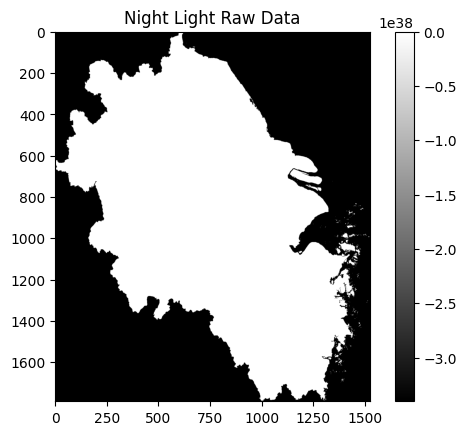

In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# 读取TIFF文件
filepath ='2012/2012.tif'
with rasterio.open(filepath) as src:
    img = src.read(1)  # 读取第一个波段（灰度图）
    meta = src.meta    # 获取地理元数据（坐标系、分辨率等）

# 显示图像
plt.imshow(img, cmap='gray')
plt.colorbar()
plt.title("Night Light Raw Data")
plt.show()

2.2 检查数据范围

In [ ]:
print("图像尺寸:", img.shape)
print("最小值:", np.min(img), "最大值:", np.max(img))  # 通常范围是0-63（DMSP-OLS）或0-255（VIIRS）

图像尺寸: (1790, 1527)
最小值: -3.4028235e+38 最大值: 103.10937


数据标准化（归一化到0-1）

In [14]:
# 将无效值替换为0
img[img < 0] = 0

# 方法1：Min-Max归一化
img_normalized = (img - np.min(img)) / (np.max(img) - np.min(img))

print("最小值:", np.min(img_normalized), "最大值:", np.max(img_normalized))  # 通常范围是0-63（DMSP-OLS）或0-255（VIIRS）

最小值: 0.0 最大值: 1.0


降噪处理（以中值滤波为例）

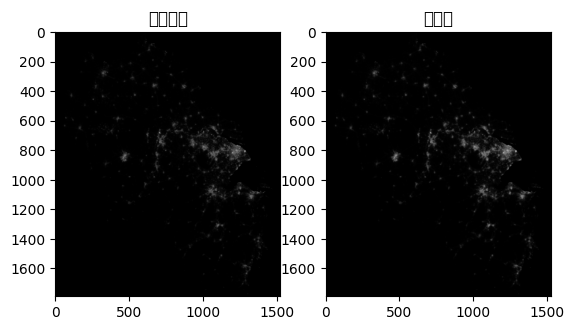

In [12]:
import cv2

# 中值滤波（窗口大小5x5）
img_denoised = cv2.medianBlur(img_normalized.astype('float32'), 5)

# 对比效果
plt.subplot(1,2,1).imshow(img_normalized, cmap='gray')
plt.title("原始图像")
plt.subplot(1,2,2).imshow(img_denoised, cmap='gray')
plt.title("降噪后")
plt.show()

In [15]:
total_light = np.sum(img_denoised)
print("区域总亮度:", total_light)

区域总亮度: 22834.258


计算纹理特征（以灰度共生矩阵为例）